In [91]:
import pandas as pd
import numpy as np
#
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
#
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
#
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
# clf = SGDClassifier(loss='log', max_iter=1000,learning_rate='constant', eta0=0.01, random_state=0)
# clf.fit(X_train, y_train)
from sklearn.impute import KNNImputer
#
# from fancyimpute import IterativeImputer,KNN
#
import scipy.stats as stats
#
from sklearn import metrics
#
# from imblearn.over_sampling import SMOTE
#
from sklearn.metrics import classification_report , accuracy_score , recall_score
#
# from pycaret.classification import *
#
import warnings
warnings.filterwarnings('ignore')

# Read Train Data

In [92]:
train_data=pd.read_csv("test.csv",sep=",",encoding="utf-8")
train_data.sample(10)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
25494,0x140c8,CUS_0xa37f,November,NaN,41,189-57-2479,Developer,34751.53,3121.960833,4,...,6.0,Standard,421.45,24.078641,25 Years and 2 Months,No,60577.000000,100.5240155729343,High_spent_Medium_value_payments,387.1355283821164
38262,0x1d668,CUS_0x9b6b,November,Hyunjoo Jinr,29,717-52-8463,Accountant,93226.5,7755.875000,5,...,8.0,Good,121.02_,34.097698,30 Years and 0 Months,No,244.425908,522.2949933184914,High_spent_Small_value_payments,268.86659840058155
23580,0x12a5e,CUS_0x92e3,September,NaN,30,811-73-6476,Journalist,68122.46,5424.871667,4,...,2.0,Good,1171.17,40.315138,27 Years and 7 Months,NM,86.778365,293.04733649159215,Low_spent_Large_value_payments,432.66146504033685
25519,0x14111,CUS_0xa2b9,December,Gabrielw,53,261-38-1072,Scientist,27172.31,2203.359167,7,...,2.0,Standard,1235.92,25.742873,17 Years and 9 Months,No,13.139579,146.0739917711611,High_spent_Small_value_payments,321.12234602042906
31959,0x18c89,CUS_0x2abd,December,Paola Arosior,45,539-11-2283,Entrepreneur,18525986.0,NaN,5,...,5.0,_,15.81,33.881881,30 Years and 8 Months,NM,124.734381,__10000__,Low_spent_Large_value_payments,280.56650987942817
11726,0x9f70,CUS_0x28b4,November,Lefterise,33,202-06-5346,Journalist,36945.28,3347.773333,7,...,8.0,Standard,1465.01,36.433453,24 Years and 9 Months,Yes,16.014105,__10000__,High_spent_Large_value_payments,503.50168736531197
19266,0xf7cc,CUS_0x1ad6,November,Ilona Wissenbachm,14,127-10-3342,Lawyer,6601238.0,10847.340000,5,...,11.0,Standard,217.91,30.809238,15 Years and 6 Months,Yes,695.083147,1291.9084396081055,Low_spent_Small_value_payments,NaN
5764,0x5996,CUS_0xa995,September,Chadbournw,48,241-86-3282,Engineer,77480.73,6325.727500,4,...,8.0,Good,1311.24,25.992113,29 Years and 4 Months,NM,127.185567,156.96196759975624,High_spent_Large_value_payments,588.4252154408875
44357,0x21dd7,CUS_0xb26,October,yv,42,644-23-8314,Engineer,8898.785,973.565417,9,...,14.0,Bad,1292.14,22.843763,9 Years and 0 Months,Yes,54.340084,39.72965226304849,High_spent_Medium_value_payments,253.286805719672
26453,0x14c07,CUS_0x760c,October,Lashb,32,929-07-7881,Manager,106309.8,8410.875663,5,...,4.0,_,241.08,33.715957,17 Years and 2 Months,No,711.901739,81.49077401254175,High_spent_Large_value_payments,853.396824210953


###### ID: Represents a unique identification of an entry
###### Customer_ID: Represents a unique identification of a person
###### Month: Represents the month of the year
###### Name: Represents the name of a person
###### Age: Represents the age of the person
###### SSN: Represents the social security number of a person
###### Occupation: Represents the occupation of the person
###### Annual_Income: Represents the annual income of the person 
###### Monthly_Inhand_Salary: Represents the monthly base salary of a person
###### Num_Bank_Accounts: Represents the number of bank accounts a person holds
###### Num_Credit_Card: Represents the number of other credit cards held by a person
###### Interest_Rate: Represents the interest rate on credit card
###### Num_of_Loan: Represents the number of loans taken from the bank
###### Type_of_Loan: Represents the types of loan taken by a person
###### Delay_from_due_date: Represents the average number of days delayed from the payment date
###### Num_of_Delayed_Payment: Represents the average number of payments delayed by a person
###### Changed_Credit_Limit: Represents the percentage change in credit card limit
###### Num_Credit_Inquiries: Represents the number of credit card inquiries
###### Credit_Mix: Represents the classification of the mix of credits
###### Outstanding_Debt: Represents the remaining debt to be paid 
###### Credit_Utilization_Ratio: Represents the utilization ratio of credit card
###### Credit_History_Age: Represents the age of credit history of the person
###### Payment_of_Min_Amount: Represents whether only the minimum amount was paid by the person
###### Total_EMI_per_month: Represents the monthly EMI payments  
###### Amount_invested_monthly: Represents the monthly amount invested by the customer 
###### Payment_Behaviour: Represents the payment behavior of the customer 
###### Monthly_Balance:Represents the monthly balance amount of the customer 
###### Credit_Score:Represents the bracket of credit score (Poor, Standard, Good) ((Target))

In [93]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        50000 non-null  object 
 1   Customer_ID               50000 non-null  object 
 2   Month                     50000 non-null  object 
 3   Name                      44985 non-null  object 
 4   Age                       50000 non-null  object 
 5   SSN                       50000 non-null  object 
 6   Occupation                50000 non-null  object 
 7   Annual_Income             50000 non-null  object 
 8   Monthly_Inhand_Salary     42502 non-null  float64
 9   Num_Bank_Accounts         50000 non-null  int64  
 10  Num_Credit_Card           50000 non-null  int64  
 11  Interest_Rate             50000 non-null  int64  
 12  Num_of_Loan               50000 non-null  object 
 13  Type_of_Loan              44296 non-null  object 
 14  Delay_

In [94]:
train_data.describe(include='object').T

,count,unique,top,freq
ID,50000,50000,0x160a,1
Customer_ID,50000,12500,CUS_0xd40,4
Month,50000,4,September,12500
Name,44985,10139,Stevex,22
Age,50000,976,39,1493
SSN,50000,12501,#F%$D@*&8,2828
Occupation,50000,16,_______,3438
Annual_Income,50000,16121,109945.32,8
Num_of_Loan,50000,263,2,7173
Type_of_Loan,44296,6260,Not Specified,704


In [95]:
train_data.duplicated().sum()

0

In [96]:
train_data.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'],
      dtype='object')

In [97]:
#Checking the values in the data whether they are valid or not
for i in train_data.columns:
    if train_data[i].dtype == type(object):
        print(i,end=': ')
        print('\n',train_data[i].unique())
        print()

ID: 
 ['0x160a' '0x160b' '0x160c' ... '0x25fef' '0x25ff0' '0x25ff1']

Customer_ID: 
 ['CUS_0xd40' 'CUS_0x21b1' 'CUS_0x2dbc' ... 'CUS_0xaf61' 'CUS_0x8600'
 'CUS_0x942c']

Month: 
 ['September' 'October' 'November' 'December']

Name: 
 ['Aaron Maashoh' 'Rick Rothackerj' 'Langep' ... 'Chris Wickhamm'
 'Sarah McBridec' 'Nicks']

Age: 
 ['23' '24' '24_' '28' '35' '55' '22' '31' '32' '1694' '34' '30' '914' '45'
 '41_' '41' '33' '36' '39' '40' '40_' '37' '21' '46' '26' '27' '32_' '42'
 '42_' '20' '48' '49' '33_' '38' '38_' '44' '-500' '16' '17' '37_' '19_'
 '19' '3193' '43' '339' '14' '15' '25' '21_' '1203' '46_' '2823' '22_'
 '18' '47' '1643' '20_' '35_' '8327_' '29' '29_' '28_' '53' '56' '26_'
 '6586' '7014' '3391' '54' '3765' '43_' '18_' '47_' '4472' '50' '4022'
 '48_' '4576' '51' '52' '34_' '50_' '3355' '8034' '4610_' '27_' '31_'
 '7860' '36_' '2526' '45_' '3263' '4885' '51_' '39_' '25_' '694' '8288'
 '52_' '8404' '451' '3168' '5172' '8214' '4946' '3127' '55_' '7018' '2950'
 '7676' '5502'

#### Some columns you may think that they are numerical but detected as object (categorical)


# Preprocessing and Handle invalid data
.we handle invalid data by replacing it with nan and removing in valid letters and symbols


In [98]:
train_data.isnull().sum()

ID                             0
Customer_ID                    0
Month                          0
Name                        5015
Age                            0
SSN                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary       7498
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                5704
Delay_from_due_date            0
Num_of_Delayed_Payment      3498
Changed_Credit_Limit           0
Num_Credit_Inquiries        1035
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age          4470
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly     2271
Payment_Behaviour              0
Monthly_Balance              562
dtype: int64

In [99]:
train_data=train_data.drop(columns=["ID","Name","SSN"],axis=1)

In [100]:
train_data["Customer_ID"].duplicated().sum()

37500

## Credit_Mix

In [101]:
train_data["Credit_Mix"].value_counts()

Credit_Mix
Standard    18379
Good        12260
_            9805
Bad          9556
Name: count, dtype: int64

In [102]:
train_data['Credit_Mix']=train_data['Credit_Mix'].replace('_',np.nan)

## Changed_Credit_Limit

In [103]:
train_data["Changed_Credit_Limit"].value_counts()

Changed_Credit_Limit
_                      1059
11.5                     70
11.32                    63
7.01                     60
7.35                     60
                       ... 
-0.6099999999999999       1
21.61                     1
12.010000000000002        1
0.43000000000000016       1
29.17                     1
Name: count, Length: 3927, dtype: int64

In [104]:
train_data["Changed_Credit_Limit"].describe()

count     50000
unique     3927
top           _
freq       1059
Name: Changed_Credit_Limit, dtype: object

In [105]:
train_data['Changed_Credit_Limit']=train_data['Changed_Credit_Limit'].replace('_',np.nan)

In [106]:
train_data['Changed_Credit_Limit']=train_data['Changed_Credit_Limit'].astype("float")

In [107]:
train_data["Changed_Credit_Limit"].describe()

count    48941.000000
mean        10.374844
std          6.780628
min         -6.450000
25%          5.340000
50%          9.410000
75%         14.800000
max         36.650000
Name: Changed_Credit_Limit, dtype: float64

In [108]:
train_data['Changed_Credit_Limit']=train_data['Changed_Credit_Limit'].fillna(train_data["Changed_Credit_Limit"].mean())

In [109]:
train_data['Changed_Credit_Limit']=train_data['Changed_Credit_Limit'].round(3)

## Monthly_Balance

In [110]:
train_data["Monthly_Balance"].value_counts()

Monthly_Balance
__-333333333333333333333333333__    6
186.26670208571772                  1
223.40782977501067                  1
305.43786598764547                  1
389.53754307843735                  1
                                   ..
421.25686767906984                  1
194.44026842190848                  1
299.957837924029                    1
375.897928536186                    1
360.37968260123847                  1
Name: count, Length: 49433, dtype: int64

In [111]:
train_data['Monthly_Balance']=train_data['Monthly_Balance'].replace('__-333333333333333333333333333__',np.nan)
train_data['Monthly_Balance']=train_data['Monthly_Balance'].astype("float")

In [112]:
train_data['Monthly_Balance']=train_data['Monthly_Balance'].fillna(train_data["Monthly_Balance"].mean())
train_data['Monthly_Balance']=train_data['Monthly_Balance'].round(3)

## Payment_Behaviour

In [113]:
train_data["Payment_Behaviour"].value_counts()

Payment_Behaviour
Low_spent_Small_value_payments      12694
High_spent_Medium_value_payments     8922
High_spent_Large_value_payments      6844
Low_spent_Medium_value_payments      6837
High_spent_Small_value_payments      5651
Low_spent_Large_value_payments       5252
!@9#%8                               3800
Name: count, dtype: int64

In [114]:
train_data["Payment_Behaviour"]=train_data["Payment_Behaviour"].replace("!@9#%8",np.nan)

In [115]:
train_data["Payment_Behaviour"]=train_data["Payment_Behaviour"].replace("Low_spent_Small_value_payments",1)
train_data["Payment_Behaviour"]=train_data["Payment_Behaviour"].replace("Low_spent_Medium_value_payments",2)
train_data["Payment_Behaviour"]=train_data["Payment_Behaviour"].replace("Low_spent_Large_value_payments",3)
train_data["Payment_Behaviour"]=train_data["Payment_Behaviour"].replace("High_spent_Small_value_payments",4)
train_data["Payment_Behaviour"]=train_data["Payment_Behaviour"].replace("High_spent_Medium_value_payments",5)
train_data["Payment_Behaviour"]=train_data["Payment_Behaviour"].replace("High_spent_Large_value_payments",6)

In [116]:
train_data["Payment_Behaviour"].ffill(inplace=True)

In [117]:
train_data["Payment_Behaviour"]=train_data["Payment_Behaviour"].astype("int64")

## Age

In [118]:
train_data["Age"].value_counts()

Age
39      1493
32      1440
44      1428
22      1422
35      1414
        ... 
437        1
1419       1
120        1
2552       1
4975       1
Name: count, Length: 976, dtype: int64

In [119]:
def filter_col(value):
    if '-' in value:
        return value.split('-')[1]
    elif '_' in value:
        return value.split('_')[0]
    else:
        return value

In [120]:
train_data["Age"] = train_data["Age"].apply(filter_col)
train_data["Age"] = train_data["Age"].astype(int)

In [121]:
for i in range(len(train_data["Age"])):
    if train_data["Age"][i] > 90 or train_data["Age"][i] < 10:
        train_data["Age"][i] = np.nan
    else:
        train_data["Age"][i] = train_data["Age"][i]

## Annual_Income

In [122]:
train_data["Annual_Income"] = train_data["Annual_Income"].apply(filter_col)
train_data["Annual_Income"] = train_data["Annual_Income"].astype(float)

## Num_of_Loan

In [123]:
train_data["Num_of_Loan"]

0         4
1         4
2         4
3         4
4         1
         ..
49995     5
49996    2_
49997     2
49998    2_
49999     2
Name: Num_of_Loan, Length: 50000, dtype: object

In [124]:
train_data["Num_of_Loan"] = train_data["Num_of_Loan"].apply(filter_col)

In [125]:
train_data["Num_of_Loan"]=train_data["Num_of_Loan"].astype(int)

In [126]:
train_data[train_data["Num_of_Loan"]>100]

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
10,CUS_0x2dbc,November,35.0,Engineer,143162.640,12187.220000,1,5,8,1381,...,5.0,Good,1303.01_,31.819845,18 Years and 7 Months,No,246.992319,841.2322359154716,2,410.497
271,CUS_0xa156,December,43.0,Entrepreneur,58674.660,4824.555000,8,5,15,965,...,11.0,Bad,2425.38,29.824791,14 Years and 0 Months,Yes,116.103417,__10000__,6,573.163
571,CUS_0x230a,December,48.0,Musician,28587.290,NaN,4,1,7,428,...,1.0,Good,1496.38,28.462478,25 Years and 1 Months,No,0.000000,170.6586495440418,1,381.469
778,CUS_0xb217,November,48.0,Architect,31895.070,NaN,3,6,2,256,...,4.0,NaN,220.33,26.321967,22 Years and 6 Months,No,60.322845,34.72036547358377,6,393.849
816,CUS_0x23a6,September,38.0,Doctor,14224.655,1395.387917,8,6,13,495,...,5.0,Standard,1343.01,29.341206,33 Years and 4 Months,No,7.642057,171.49312989051938,1,250.404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49133,CUS_0xa568,October,40.0,Scientist,120009.320,10242.776667,5,1,7,594,...,0.0,Good,446.51,27.262236,29 Years and 5 Months,No,230.528352,828.3248019344123,3,235.425
49348,CUS_0x720e,September,27.0,Entrepreneur,14458.000,1251.833333,3,8,29,1442,...,13.0,NaN,1701.54,31.941568,NaN,Yes,47.876044,43.82655578021143,4,293.481
49387,CUS_0x29f5,December,37.0,Developer,101316.640,8526.053333,3,6,9,939,...,7.0,Standard,559.18,29.153248,19 Years and 0 Months,No,166.272881,512.6893908819077,3,443.643
49402,CUS_0x7d4d,November,22.0,Engineer,40511.740,3439.978333,3,6,16,172,...,9.0,Standard,2272.58,28.179355,17 Years and 2 Months,NM,69.282779,45.55725973327668,6,469.158


In [127]:
for i in range(len(train_data["Num_of_Loan"])):
    if train_data["Num_of_Loan"][i] > 100:
        train_data["Num_of_Loan"][i] = np.nan
    else:
        train_data["Num_of_Loan"][i] = train_data["Num_of_Loan"][i]

## Outstanding_Debt

In [128]:
train_data["Outstanding_Debt"] = train_data["Outstanding_Debt"].apply(filter_col)
train_data["Outstanding_Debt"] = train_data["Outstanding_Debt"].astype(float)

## Occupation

In [129]:
train_data["Occupation"].value_counts()

Occupation
_______          3438
Lawyer           3324
Engineer         3212
Architect        3195
Mechanic         3168
Developer        3146
Accountant       3133
Media_Manager    3130
Scientist        3104
Teacher          3103
Entrepreneur     3103
Journalist       3037
Doctor           3027
Manager          3000
Musician         2947
Writer           2933
Name: count, dtype: int64

In [130]:
train_data["Occupation"]=train_data["Occupation"].replace("_______",np.nan)

In [131]:
train_data["Occupation"]=train_data["Occupation"].astype("object")

## Num_of_Delayed_Payment

In [132]:
train_data["Num_of_Delayed_Payment"].value_counts()

Num_of_Delayed_Payment
19      2622
15      2594
18      2570
16      2548
17      2545
        ... 
288        1
3556       1
3393       1
4351       1
2034       1
Name: count, Length: 443, dtype: int64

In [133]:
def filter_(value:str):
    if '_' in str(value):
        return value.split('_')[0]
    else:
        return value
train_data["Num_of_Delayed_Payment"]= train_data["Num_of_Delayed_Payment"].apply(filter_)

In [134]:
train_data["Num_of_Delayed_Payment"]= train_data["Num_of_Delayed_Payment"].astype("Int64")

## Payment_of_Min_Amount

In [135]:
train_data["Payment_of_Min_Amount"].value_counts()

Payment_of_Min_Amount
Yes    26158
No     17849
NM      5993
Name: count, dtype: int64

## Binning for Credit_History_Age

In [136]:
train_data["Credit_History_Age"].value_counts()

Credit_History_Age
20 Years and 1 Months     254
16 Years and 1 Months     254
18 Years and 7 Months     252
19 Years and 7 Months     252
18 Years and 6 Months     250
                         ... 
4 Years and 5 Months       21
0 Years and 11 Months      16
33 Years and 11 Months     15
34 Years and 0 Months      14
0 Years and 10 Months      13
Name: count, Length: 399, dtype: int64

In [137]:
#train data
years  = []
months = []
for value in train_data["Credit_History_Age"]:
    if value is np.nan:
        years.append(np.nan)
        months.append(np.nan)
    else:
        new_str = value.lower().split()
        years_ = int(new_str[0])
        months_ = int(new_str[new_str.index('and')+1])
        years.append(years_)
        months.append(months_)
train_data['Credit_Age_years'] = pd.Series(years)
train_data['Credit_Age_months'] = pd.Series(months) 
train_data.drop('Credit_History_Age',axis=1,inplace=True)

## Customer_ID

In [138]:
train_data["Customer_ID"].value_counts()

Customer_ID
CUS_0xd40     4
CUS_0x9bf4    4
CUS_0x5ae3    4
CUS_0xbe9a    4
CUS_0x4874    4
             ..
CUS_0x2eb4    4
CUS_0x7863    4
CUS_0x9d89    4
CUS_0xc045    4
CUS_0x942c    4
Name: count, Length: 12500, dtype: int64

## Month

In [139]:
train_data["Month"].value_counts()

Month
September    12500
October      12500
November     12500
December     12500
Name: count, dtype: int64

In [140]:
train_month={"September":9,"October":10,"November":11,"December":12}
train_data["Month"]=train_data["Month"].replace(train_month)

## Monthly_Inhand_Salary

In [141]:
train_data["Monthly_Inhand_Salary"].value_counts()

Monthly_Inhand_Salary
1315.560833     8
6639.560000     7
2295.058333     7
6082.187500     7
536.431250      7
               ..
12386.966240    1
5993.870000     1
6763.330000     1
7729.695181     1
2312.785000     1
Name: count, Length: 12793, dtype: int64

## Num_Bank_Accounts

In [142]:
train_data["Num_Bank_Accounts"].value_counts()

Num_Bank_Accounts
6       6504
7       6408
8       6387
4       6100
5       6068
        ... 
855        1
1262       1
908        1
603        1
1727       1
Name: count, Length: 540, dtype: int64

In [143]:
train_data[train_data["Num_Bank_Accounts"]<0]["Num_Bank_Accounts"].value_counts()

Num_Bank_Accounts
-1    16
Name: count, dtype: int64

In [144]:
train_data["Num_Bank_Accounts"]=train_data["Num_Bank_Accounts"].replace(-1,0)

In [145]:
train_data[train_data["Num_Bank_Accounts"]> 300]["Num_Bank_Accounts"].value_counts()

Num_Bank_Accounts
1542    4
968     3
915     3
1563    3
1434    3
       ..
301     1
958     1
794     1
1247    1
1727    1
Name: count, Length: 437, dtype: int64

In [146]:
for i in range(len(train_data["Num_Bank_Accounts"])) :
    if train_data["Num_Bank_Accounts"][i] > 300 :
        train_data["Num_Bank_Accounts"][i]= np.nan
    else: 
        train_data["Num_Bank_Accounts"][i]=train_data["Num_Bank_Accounts"][i]

In [147]:
train_data["Num_Bank_Accounts"]=train_data["Num_Bank_Accounts"].round().astype('Int64')


## Num_Credit_Card

In [148]:
train_data["Num_Credit_Card"].value_counts()

Num_Credit_Card
5       9210
7       8271
6       8243
4       7072
3       6539
        ... 
662        1
445        1
78         1
1488       1
955        1
Name: count, Length: 819, dtype: int64

In [149]:
train_data[train_data["Num_Credit_Card"]<0]["Num_Credit_Card"].sum()

0

## Interest_Rate

In [150]:
train_data["Interest_Rate"].value_counts()

Interest_Rate
8       2503
5       2500
6       2368
12      2288
10      2259
        ... 
1573       1
3279       1
1166       1
5613       1
4252       1
Name: count, Length: 945, dtype: int64

## Type_of_Loan

In [151]:
train_data["Type_of_Loan"]=train_data["Type_of_Loan"].astype("object")

In [152]:
train_data.isnull().sum()

Customer_ID                    0
Month                          0
Age                         1403
Occupation                  3438
Annual_Income                  0
Monthly_Inhand_Salary       7498
Num_Bank_Accounts            527
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                  246
Type_of_Loan                5704
Delay_from_due_date            0
Num_of_Delayed_Payment      3498
Changed_Credit_Limit           0
Num_Credit_Inquiries        1035
Credit_Mix                  9805
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly     2271
Payment_Behaviour              0
Monthly_Balance                0
Credit_Age_years            4470
Credit_Age_months           4470
dtype: int64

In [153]:
train_data["Type_of_Loan"] = train_data["Type_of_Loan"].fillna(train_data["Type_of_Loan"].ffill())

In [154]:
train_data.isnull().sum()

Customer_ID                    0
Month                          0
Age                         1403
Occupation                  3438
Annual_Income                  0
Monthly_Inhand_Salary       7498
Num_Bank_Accounts            527
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                  246
Type_of_Loan                   0
Delay_from_due_date            0
Num_of_Delayed_Payment      3498
Changed_Credit_Limit           0
Num_Credit_Inquiries        1035
Credit_Mix                  9805
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly     2271
Payment_Behaviour              0
Monthly_Balance                0
Credit_Age_years            4470
Credit_Age_months           4470
dtype: int64

## Delay_from_due_date

In [155]:
train_data["Delay_from_due_date"].value_counts()

Delay_from_due_date
 13    1761
 15    1759
 8     1680
 9     1656
 10    1645
       ... 
 65      30
 63      21
-5       18
 66      12
 67       7
Name: count, Length: 73, dtype: int64

In [156]:
(train_data["Delay_from_due_date"]<0).sum()

298

In [157]:
for i in range(len(train_data["Delay_from_due_date"])):
    if train_data["Delay_from_due_date"][i] <0:
        train_data["Delay_from_due_date"][i] = 0
    else:
        train_data["Delay_from_due_date"][i] = train_data["Delay_from_due_date"][i]

## Num_Credit_Inquiries

In [158]:
train_data["Num_Credit_Inquiries"].value_counts()

Num_Credit_Inquiries
5.0       4709
4.0       4402
6.0       4375
7.0       4295
8.0       3922
          ... 
1471.0       1
307.0        1
1326.0       1
904.0        1
352.0        1
Name: count, Length: 750, dtype: int64

In [159]:
(train_data["Num_Credit_Inquiries"]<0).sum()

0

## Credit_Utilization_Ratio

In [160]:
train_data["Credit_Utilization_Ratio"].value_counts()

Credit_Utilization_Ratio
35.030402    1
24.962925    1
32.546656    1
35.641022    1
27.277364    1
            ..
40.725304    1
33.004488    1
26.441658    1
24.342582    1
34.108530    1
Name: count, Length: 50000, dtype: int64

In [161]:
train_data["Credit_Utilization_Ratio"]=train_data["Credit_Utilization_Ratio"].round(3)


## Total_EMI_per_month

In [162]:
train_data["Total_EMI_per_month"].value_counts()

Total_EMI_per_month
0.000000        5002
49.574949          4
16.941903          4
420.199367         4
550.679394         4
                ... 
65628.000000       1
92.396923          1
191.296729         1
61274.000000       1
50090.000000       1
Name: count, Length: 13144, dtype: int64

In [163]:
train_data["Total_EMI_per_month"]=train_data["Total_EMI_per_month"].astype("float")


In [164]:
train_data["Total_EMI_per_month"]=train_data["Total_EMI_per_month"].round(3)


## Amount_invested_monthly 

In [165]:
train_data["Amount_invested_monthly"].value_counts()

Amount_invested_monthly
__10000__             2175
0.0                    106
236.64268203272135       1
160.0977166999812        1
320.4566446914704        1
                      ... 
197.2171314766754        1
366.23148415217315       1
34.89940643392877        1
256.90830529853173       1
220.45787812168732       1
Name: count, Length: 45450, dtype: int64

In [166]:
train_data["Amount_invested_monthly"]=train_data["Amount_invested_monthly"].replace("__10000__",np.nan)
train_data["Amount_invested_monthly"]=train_data["Amount_invested_monthly"].astype("float")
train_data["Amount_invested_monthly"]=train_data["Amount_invested_monthly"].round(3)

# Fill The Missing Vlues 

# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #


<Axes: >

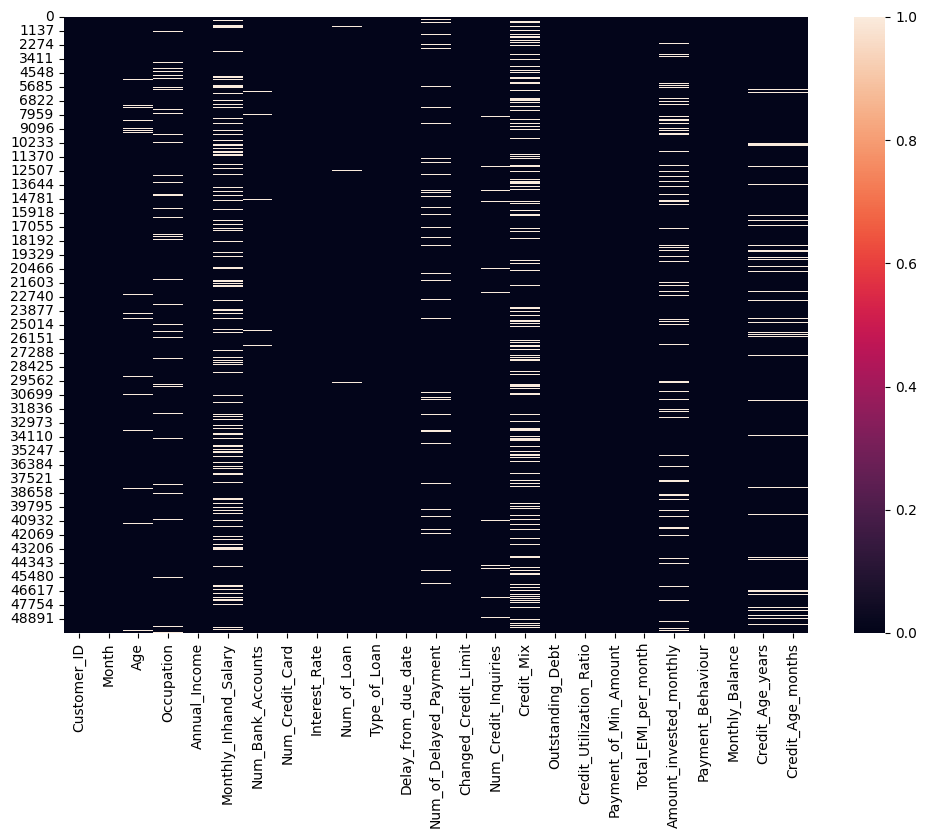

In [167]:
plt.figure(figsize=(12,8))
sns.heatmap(train_data.isnull())

### Random Choice

In [168]:
# for column in train_data.columns:
#     missing_indices = train_data[train_data[column].isnull()].index
#     available_values = train_data[column].dropna()
    
#     for index in missing_indices:
#         random_choice = np.random.choice(available_values)
#         train_data.at[index, column] = random_choice

In [169]:
# pd.DataFrame(train_data)

In [170]:
# plt.figure(figsize=(12,8))
# sns.heatmap(train_data.isnull())

# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #

## 1-Fill Numerical Data

### KNN Imputer

In [171]:
numerical_data = []
object_data = []

for column in train_data.columns:
    if train_data.dtypes[column] != 'object':
        numerical_data.append(column)
    else:
        object_data.append(column)

In [172]:
imputer = KNNImputer(n_neighbors=5)

In [173]:
train_data[numerical_data] = imputer.fit_transform(train_data[numerical_data])

In [174]:
train_data

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Age_years,Credit_Age_months
0,CUS_0xd40,9.0,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,Good,809.98,35.030,No,49.575,236.6430,1.0,186.267,22.0,9.0
1,CUS_0xd40,10.0,24.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,Good,809.98,33.053,No,49.575,21.4650,5.0,361.444,22.0,10.0
2,CUS_0xd40,11.0,24.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,Good,809.98,33.812,No,49.575,148.2340,2.0,264.675,23.8,2.2
3,CUS_0xd40,12.0,24.0,Scientist,19114.12,1470.010500,3.0,4.0,3.0,4.0,...,Good,809.98,32.431,No,49.575,39.0830,5.0,343.827,23.0,0.0
4,CUS_0x21b1,9.0,28.0,NaN,34847.84,3037.986667,2.0,4.0,6.0,1.0,...,Good,605.03,25.927,No,18.816,39.6840,6.0,485.298,27.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,CUS_0x8600,12.0,28.2,Architect,20002.88,1929.906667,10.0,8.0,29.0,5.0,...,NaN,3571.70,34.781,Yes,60.965,146.4860,1.0,275.540,4.0,4.6
49996,CUS_0x942c,9.0,25.0,Mechanic,39628.99,3305.187500,4.0,6.0,7.0,2.0,...,Good,502.38,27.759,NM,35.104,181.4430,1.0,409.395,31.0,11.0
49997,CUS_0x942c,10.0,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,...,Good,502.38,36.859,No,35.104,151.5616,3.0,349.726,32.0,0.0
49998,CUS_0x942c,11.0,25.0,Mechanic,39628.99,3333.613500,4.0,6.0,7.0,2.0,...,Good,502.38,39.140,No,35.104,97.5990,4.0,463.239,32.0,1.0


In [175]:
train_data.isnull().sum()

Customer_ID                    0
Month                          0
Age                            0
Occupation                  3438
Annual_Income                  0
Monthly_Inhand_Salary          0
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                   0
Delay_from_due_date            0
Num_of_Delayed_Payment         0
Changed_Credit_Limit           0
Num_Credit_Inquiries           0
Credit_Mix                  9805
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly        0
Payment_Behaviour              0
Monthly_Balance                0
Credit_Age_years               0
Credit_Age_months              0
dtype: int64

<Axes: >

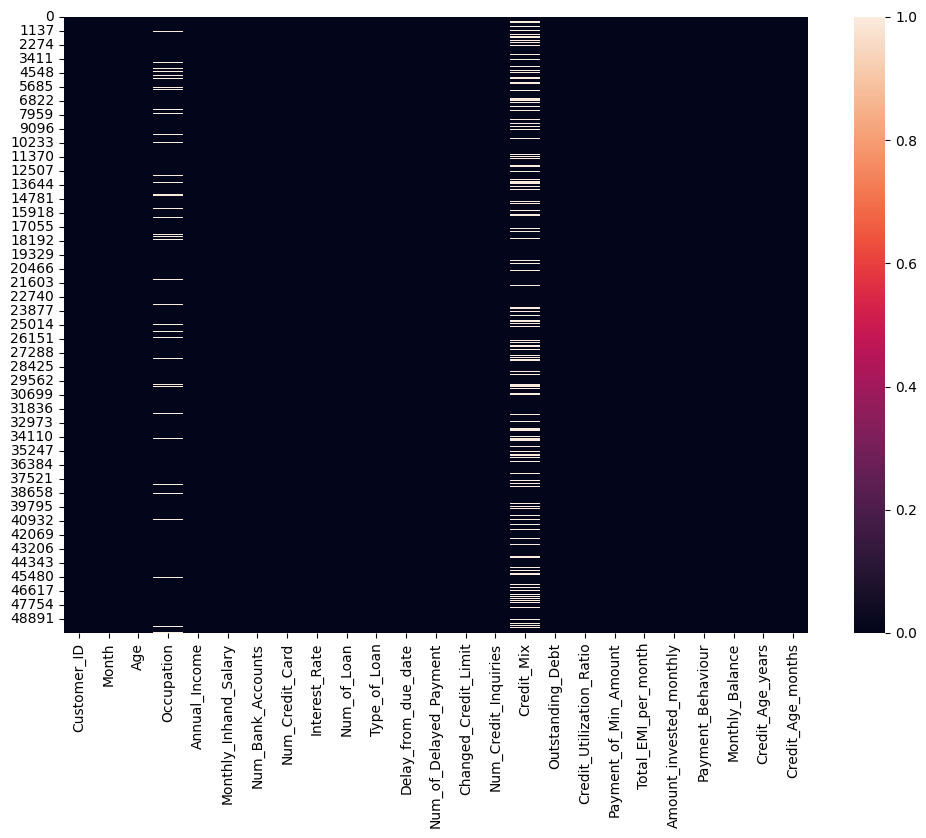

In [176]:
plt.figure(figsize=(12,8))
sns.heatmap(train_data.isnull())

## 2-Fill Categorical Data

### Occupation

In [177]:
#train_data["Monthly_Inhand_Salary"].value_counts().head(20)                            #to know why i use ffill
#train_data.loc[train_data["Monthly_Inhand_Salary"] ==1359.206250, "Occupation"]        #to know why i use ffill
train_data['Occupation'].ffill(inplace=True)
#train_data["Monthly_Inhand_Salary"].value_counts().head(10)
#train_data.loc[train_data["Monthly_Inhand_Salary"] ==1359.206250, "Occupation"] 

In [178]:
train_data["Monthly_Inhand_Salary"]=train_data["Monthly_Inhand_Salary"].round(3)

### Credit_Mix

In [179]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_ID               50000 non-null  object 
 1   Month                     50000 non-null  float64
 2   Age                       50000 non-null  float64
 3   Occupation                50000 non-null  object 
 4   Annual_Income             50000 non-null  float64
 5   Monthly_Inhand_Salary     50000 non-null  float64
 6   Num_Bank_Accounts         50000 non-null  float64
 7   Num_Credit_Card           50000 non-null  float64
 8   Interest_Rate             50000 non-null  float64
 9   Num_of_Loan               50000 non-null  float64
 10  Type_of_Loan              50000 non-null  object 
 11  Delay_from_due_date       50000 non-null  float64
 12  Num_of_Delayed_Payment    50000 non-null  float64
 13  Changed_Credit_Limit      50000 non-null  float64
 14  Num_Cr

In [180]:
train_data['Credit_Mix']=train_data['Credit_Mix'].replace("Standard",1)
train_data['Credit_Mix']=train_data['Credit_Mix'].replace("Bad",2)
train_data['Credit_Mix']=train_data['Credit_Mix'].replace("Good",3)

In [181]:
imputer = IterativeImputer(max_iter=10, random_state=0)

credit_mix_data = train_data['Credit_Mix'].values.reshape(-1, 1)

train_data['Credit_Mix'] = imputer.fit_transform(credit_mix_data)

NameError: name 'IterativeImputer' is not defined

In [182]:
train_data.isnull().sum()

Customer_ID                    0
Month                          0
Age                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary          0
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                   0
Delay_from_due_date            0
Num_of_Delayed_Payment         0
Changed_Credit_Limit           0
Num_Credit_Inquiries           0
Credit_Mix                  9805
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly        0
Payment_Behaviour              0
Monthly_Balance                0
Credit_Age_years               0
Credit_Age_months              0
dtype: int64

# EDA

ploting the target

In [183]:
plt.figure(figsize=(10, 6))
plt.hist(train_data['Credit_Score'], bins=20, color='blue', alpha=0.7)
plt.title('Credit score distribution')
plt.xlabel('Credit score')
plt.ylabel('Number of customers')
plt.show()

KeyError: 'Credit_Score'

<Figure size 1000x600 with 0 Axes>

This indicates that there is a discrepancy in the distribution, and this is the problem of unbalanced data

In [ ]:
train_data.columns

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=train_data['Annual_Income'], y=train_data['Credit_Score'], hue=train_data['Credit_Score'], palette='viridis', alpha=0.5)
plt.title('Relationship of credit scores and annual income')
plt.xlabel('Annual income')
plt.ylabel('Credit score')
plt.show()

In [ ]:
plt.figure(figsize=(12,4))
sns.countplot(train_data['Occupation']);
plt.xticks(rotation=45);

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=train_data['Age'], y=train_data['Credit_Score'], hue=train_data['Occupation'], palette='viridis', alpha=0.5)
plt.title('Correlation of credit scores and age with a dispersion based on occupation')
plt.xlabel('Age')
plt.ylabel('Credit scores')
plt.show()

In [ ]:
train_data["Payment_Behaviour"]=train_data["Payment_Behaviour"].replace(1,"Low_spent_Small_value_payments")
train_data["Payment_Behaviour"]=train_data["Payment_Behaviour"].replace(2,"Low_spent_Medium_value_payments")
train_data["Payment_Behaviour"]=train_data["Payment_Behaviour"].replace(3,"Low_spent_Large_value_payments")
train_data["Payment_Behaviour"]=train_data["Payment_Behaviour"].replace(4,"High_spent_Small_value_payments")
train_data["Payment_Behaviour"]=train_data["Payment_Behaviour"].replace(5,"High_spent_Medium_value_payments")
train_data["Payment_Behaviour"]=train_data["Payment_Behaviour"].replace(6,"High_spent_Large_value_payments")

In [ ]:
p_counts = train_data['Payment_Behaviour'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(p_counts, labels=p_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Payment Behaviour types')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=train_data, y='Credit_Score', x='Delay_from_due_date', hue='Credit_Score', palette='coolwarm', alpha=0.7)
plt.title('Correlation of credit scores and the number of Delay from due date')
plt.xlabel('Credit score')
plt.ylabel('Delay from due date')
plt.show()

In [ ]:
sns.countplot(train_data['Payment_of_Min_Amount'],palette="mako");
plt.xticks(rotation=45);

In [ ]:
good_credit =train_data[train_data['Credit_Score']=="Good"]
top5=good_credit.sort_values('Annual_Income', ascending = False).head(5)

In [ ]:
plt.title('Top 5 most credit worthy people', fontsize = 20)
plt.ylabel('Annual Income')
plt.bar(top5["Customer_ID"], top5.Annual_Income, tick_label = top5.Customer_ID, color = 'orange', width = 0.4);

###### Check correlations between features

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(train_data.corr(),annot=True)
plt.show

In [ ]:
sns.distplot(train_data['Monthly_Inhand_Salary']);

In [ ]:
grid = sns.FacetGrid(train_data, col = 'Credit_Score')
grid.map(sns.distplot, 'Monthly_Inhand_Salary')

In [ ]:
sns.distplot(train_data['Delay_from_due_date']);

# Encoding

In [ ]:
train_data.info()

In [ ]:
train_data = train_data.apply(lambda x: x.astype('category').cat.codes)
train_data.head()

# Showing Outliers 

In [ ]:
train_data.describe()

In [ ]:
for i in range(0,len(numerical_data)):
    plt.figure(figsize=(10,1),dpi=80)
    sns.boxplot(x = train_data[numerical_data[i]], y=train_data['Credit_Score'], data = train_data,orient="h")
    plt.show()

In [ ]:
train_data.describe()

# Feature Selection

In [ ]:
# Create a contingency table for each categorical column
for col in train_data.columns:
    contingency_table = pd.crosstab(train_data[col],train_data['Credit_Score'])
    # Apply the chi-square test
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
    print(f"Chi-square test results for {col}:")
    print(f"Chi-square statistic: {chi2}")
    print(f"P-value: {p}")
    print(f"Degrees of freedom: {dof}")
    print(f"Expected frequencies table:\n{expected}\n")

KeyError: 'Credit_Score'

# Splitting Data

In [ ]:
x= train_data.drop(['Credit_Score','Monthly_Balance','Amount_invested_monthly','Credit_Utilization_Ratio','Occupation','Month'],axis=1)
y=train_data['Credit_Score']
x_train , x_test , y_train , y_test =train_test_split(x,y,test_size=0.2,random_state=42)

# Balanced Data

In [ ]:
labels = train_data["Credit_Score"].value_counts().index
sizes = train_data["Credit_Score"].value_counts()

plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Credit_Score Percentage',color = 'black',fontsize = 30)
plt.legend(train_data["Credit_Score"].value_counts())
plt.show()

In [ ]:
sm = SMOTE(k_neighbors=7)
x_train_sm,y_train_sm=sm.fit_resample(x_train,y_train)

In [ ]:
data_after_smote = pd.DataFrame(x_train_sm, columns=x_train.columns)
data_after_smote['target'] = y_train_sm 

In [ ]:
data_after_smote['target']

In [ ]:
labels = data_after_smote['target'].value_counts().index
sizes = data_after_smote['target'].value_counts()

plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Credit_Score Percentage',color = 'black',fontsize = 30)
plt.legend(data_after_smote['target'].value_counts())
plt.show()

In [ ]:
data_after_smote

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(data_after_smote['target'], bins=20, color='blue', alpha=0.7)
plt.title('Credit score distribution')
plt.xlabel('Credit score')
plt.ylabel('Number of customers')
plt.show()

# Splittind Data After Smote

In [ ]:
X= data_after_smote.drop(['target'],axis=1)
Y=data_after_smote['target']

# Scaling

In [ ]:
sc = StandardScaler()
X= sc.fit_transform(X)

#### preparation test data

In [ ]:
test_data=pd.read_csv("test.csv",sep=",",encoding="utf-8")
test_data=test_data.drop(columns=["ID","Name","SSN"],axis=1)
test_data["Payment_Behaviour"]=test_data["Payment_Behaviour"].replace("Low_spent_Small_value_payments",1)
test_data["Payment_Behaviour"]=test_data["Payment_Behaviour"].replace("Low_spent_Medium_value_payments",2)
test_data["Payment_Behaviour"]=test_data["Payment_Behaviour"].replace("Low_spent_Large_value_payments",3)
test_data["Payment_Behaviour"]=test_data["Payment_Behaviour"].replace("High_spent_Small_value_payments",4)
test_data["Payment_Behaviour"]=test_data["Payment_Behaviour"].replace("High_spent_Medium_value_payments",5)
test_data["Payment_Behaviour"]=test_data["Payment_Behaviour"].replace("High_spent_Large_value_payments",6)


In [ ]:
#test data
years  = []
months = []
for value in test_data["Credit_History_Age"]:
    if value is np.nan:
        years.append(np.nan)
        months.append(np.nan)
    else:
        new_str = value.lower().split()
        years_ = int(new_str[0])
        months_ = int(new_str[new_str.index('and')+1])
        years.append(years_)
        months.append(months_)
test_data['Credit_Age_years'] = pd.Series(years)
test_data['Credit_Age_months'] = pd.Series(months) 
test_data.drop('Credit_History_Age',axis=1,inplace=True)

In [ ]:
test_data["Total_EMI_per_month"]=test_data["Total_EMI_per_month"].round(3)
test_data["Total_EMI_per_month"]=test_data["Total_EMI_per_month"].astype("float")
test_data["Credit_Utilization_Ratio"]=test_data["Credit_Utilization_Ratio"].round(3)
test_data["Type_of_Loan"]=test_data["Type_of_Loan"].astype("object")
test_data["Num_Bank_Accounts"]=test_data["Num_Bank_Accounts"].round().astype('Int64')
test_data["Monthly_Inhand_Salary"]=test_data["Monthly_Inhand_Salary"].round(3)

In [ ]:
test_data['Credit_Mix']=test_data['Credit_Mix'].replace("Standard",1)
test_data['Credit_Mix']=test_data['Credit_Mix'].replace("Bad",2)
test_data['Credit_Mix']=test_data['Credit_Mix'].replace("Good",3)

In [ ]:
test_month={"September":9,"October":10,"November":11,"December":12}
test_data["Month"]=test_data["Month"].replace(test_month)

In [ ]:
# columns=train_data.drop(['Credit_Score','Monthly_Balance','Amount_invested_monthly','Credit_Utilization_Ratio','Occupation','Month'],axis=1).columns

In [ ]:
test_data=test_data.drop(['Monthly_Balance','Amount_invested_monthly','Credit_Utilization_Ratio','Occupation','Month'], axis=1)

In [ ]:
test_data.info()

In [ ]:
test_data = test_data.apply(lambda x: x.astype('category').cat.codes)
test_data.head()

# Split Data

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.3,random_state=42)

In [ ]:
pd.DataFrame(x_train_sm)

In [ ]:
y_test

# Modeling

### RF

In [ ]:
RF = RandomForestClassifier(n_estimators=100, random_state=42)  
RF.fit(x_train, y_train)

In [ ]:
RF.score(x_train,y_train)

In [ ]:
RF.score(x_test,y_test)

In [ ]:
Y_pred=RF.predict(x_test)
Y_pred

In [ ]:
df=pd.DataFrame({"y_predect":Y_pred,"y_test":y_test})
df

In [ ]:
report = classification_report(y_test, Y_pred)
print(report)

#### use test data to prediction

In [ ]:
pred=RF.predict(test_data)
pred

### Xgboost

In [ ]:
model = xgb.XGBClassifier(objective='multi:softmax', num_class=3, random_state=42)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, Y_pred)
print(f"Accuracy: {accuracy:.2f}")

In [ ]:
recall = recall_score(y_test, Y_pred, average='macro')  
print(f"Recall: {recall:.2f}")

In [ ]:
report = classification_report(y_test, y_pred)
print(report)

In [ ]:
Y_pred=model.predict(test_data)
Y_pred

In [ ]:
(Y_pred[Y_pred>0.49].shape[0]/Y_pred.shape[0])*100

## PyCaret

In [ ]:
s = setup(x_train_sm, target = y_train_sm,session_id = 123)

In [ ]:
best = compare_models()

In [ ]:
plot_model(best, plot = 'confusion_matrix')

In [ ]:
# predict on test set
p = predict_model(best)

In [ ]:
p.head()

In [ ]:
test_data.head()